# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### 1. Дискретизация и дискретное время
- **Дискретное время** описывается индексом $ n $ — номером отсчёта.  
- **Период дискретизации** $ T $ (с) определяет интервал между соседними отсчётами.  
- **Частота дискретизации** $ f_s $ (Гц) равна $ f_s = \frac{1}{T} $.  
- Связь между реальным временем и индексом: $ t = nT $.

### 2. Единичный цифровой импульс
- Обозначение: $ \delta_d[k] $.  
- Определение:  
  $
  \delta_d[k] =
  \begin{cases}
  1, & k = 0, \\
  0, & k \neq 0.
  \end{cases}
  $
- Отличие от дельта-функции Дирака $ \delta(t) $: дискретный импульс — это последовательность с конечной амплитудой 1, тогда как $\delta(t)$ — распределение с бесконечной амплитудой и единичной площадью.

### 3. Дискретный единичный скачок
- Обозначение: $ \sigma_d[k] $ или $ u[k] $.  
- Определение:  
  $
  u[k] =
  \begin{cases}
  1, & k \ge 0, \\
  0, & k < 0.
  \end{cases}
  $
- Получается выборкой аналогового единичного скачка $ u(t) $: $ u[k] = u(kT) $.

### 4. Дискретная экспоненциальная последовательность
- Обозначение: $ s_1[k] $.  
- Формула:  
  $
  s_1[k] = a^{k} u[k],
  $
  где:
  - $ a $ — основание экспоненты (может быть отрицательным),
  - $ u[k] $ — единичный скачок.
- Связь с аналоговой экспонентой $ x(t) = e^{\alpha t} u(t) $:
  $
  a = e^{\alpha T}, \quad \alpha = \frac{\ln a}{T}.
  $
- При $|a|<1$ сигнал убывает, при $|a|>1$ — возрастает; отрицательное $a$ даёт чередование знаков.

### 5. Дискретный комплексный гармонический сигнал
- Общая форма:  
  $
  s_2[k] = C e^{j \hat{\omega}_0 k},
  $
  где:
  - $ C = |C| e^{j \phi} $ — комплексная амплитуда,
  - $ \hat{\omega}_0 $ — частота в радианах на отсчёт.
- Разложение на вещественные части:
  $
  s_2[k] = |C| \cos(\hat{\omega}_0 k + \phi)
          + j |C| \sin(\hat{\omega}_0 k + \phi).
  $
- Связь с аналоговой частотой $ f $ (Гц):
  $
  \hat{\omega}_0 = 2 \pi f T.
  $

### 6. Задержка дискретных последовательностей
- Задержка на $ m $ отсчётов означает сдвиг во времени на $ mT $ секунд.  
- Основные формулы:
  $
  \delta_d[k - m] =
  \begin{cases}
  1, & k = m, \\
  0, & k \neq m,
  \end{cases}
  \qquad
  u[k - m] =
  \begin{cases}
  1, & k \ge m, \\
  0, & k < m,
  \end{cases}
  $
  $
  s_1[k - m] = a^{k - m} u[k - m].
  $

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Nb = 13
N = 30 + (Nb % 5)
T = 0.0005*(1 + (Nb % 3))
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + (Nb % 5)
w0 = np.pi / (6 + (Nb % 5))
m = 5 + (Nb % 5)

print(f'Nb = {Nb}\nN = {N}\nT = {T}\na = {a}\nC = {C}\nw0 = {w0}\nm = {m}')

def graf_plot(x, y, title, xl, yl):
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.title(title)
  plt.stem(x, y)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.show()

Nb = 13
N = 33
T = 0.001
a = -0.865
C = 4
w0 = 0.3490658503988659
m = 8


#Задание 1
Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:

a. взаимосвязь между дискретным и дискретным нормированным временем;

b. различие между единичным цифровым импульсом и дельта-функцией.

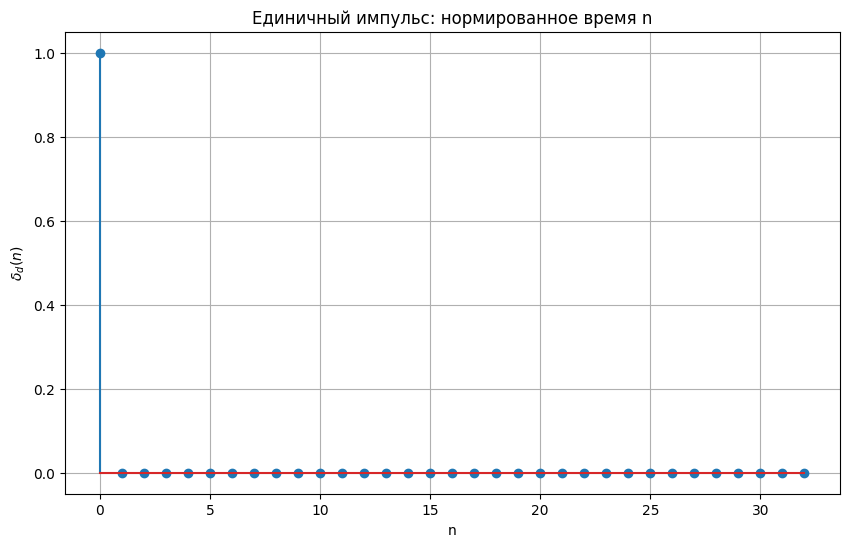

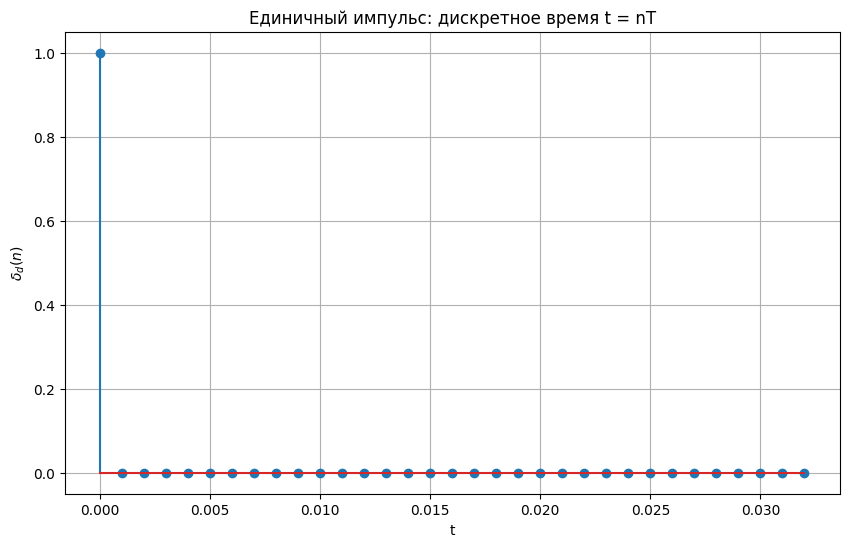

In [ ]:
n = np.arange(N)
t = n * T

delta = np.zeros(N)
delta[0] = 1

graf_plot(n, delta, 'Единичный импульс: нормированное время n', 'n', r'$\delta_d(n)$')


graf_plot(t, delta, 'Единичный импульс: дискретное время t = nT', 't', r'$\delta_d(n)$')


a. Дискретное и дискретное нормированное время связаны формулой $t = n·T$, где $t$ – время в секундах, $n ∈Z$, $T$ – шаг дискретизации

b. 	Единичный цифровой импульс — это дискретный сигнал, который существует только для целочисленных значений k. Его значение равно 1 в точке k = 0 и 0 во всех остальных точках.
Дельта-функция Дирака — это непрерывная функция, определённая для любого вещественного числа t. Её значение стремится к бесконечности в точке t = 0.


#Задание 2
Смоделировать дискретный единичный скачок $ \sigma_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить:

a. соответствие между дискретным и аналоговым единичным скачком;

b. чему равна частота дискретизации дискретного единичного скачка.

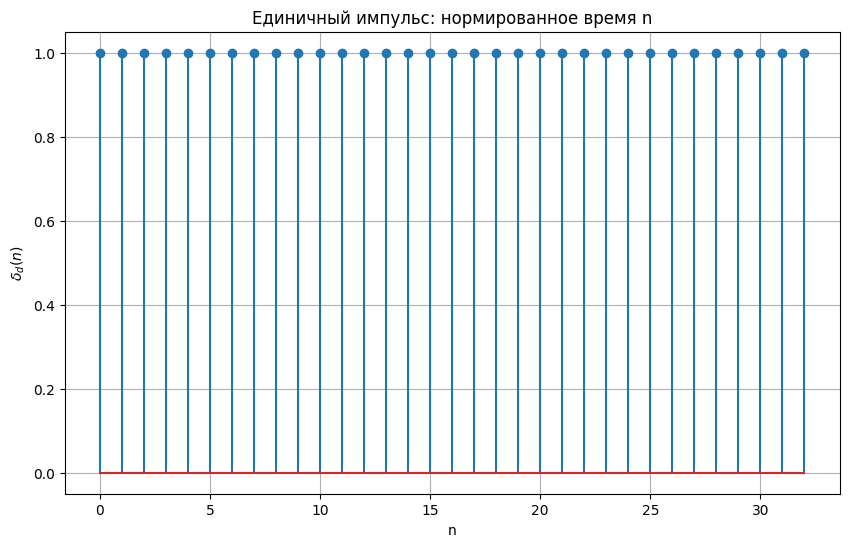

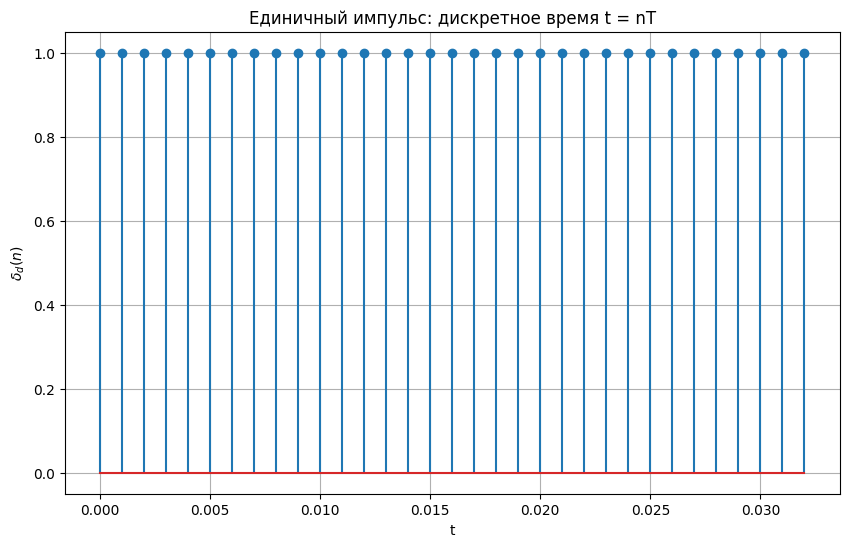

In [ ]:
sigma_d = (n >= 0).astype(int)

graf_plot(n, sigma_d, 'Единичный импульс: нормированное время n', 'n', r'$\delta_d(n)$')


graf_plot(t, sigma_d, 'Единичный импульс: дискретное время t = nT', 't', r'$\delta_d(n)$')


a. 	Дискретный скачок $σ_d (k)$ является результатом дискретизации функции Хевисайда $σ(t)$ в моменты времени $t=kT$.

b. 	Частота дискретизации дискретного единичного скачка равна
$f_d=  1/T  =  1/0.001=1000.0 $


#Задание 3
Смоделировать дискретную экспоненциальную функцию $ s_1(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.

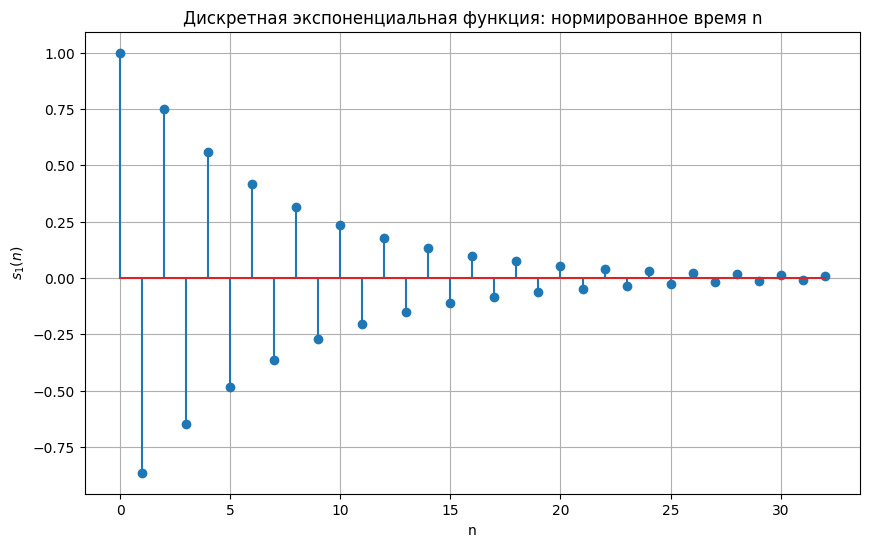

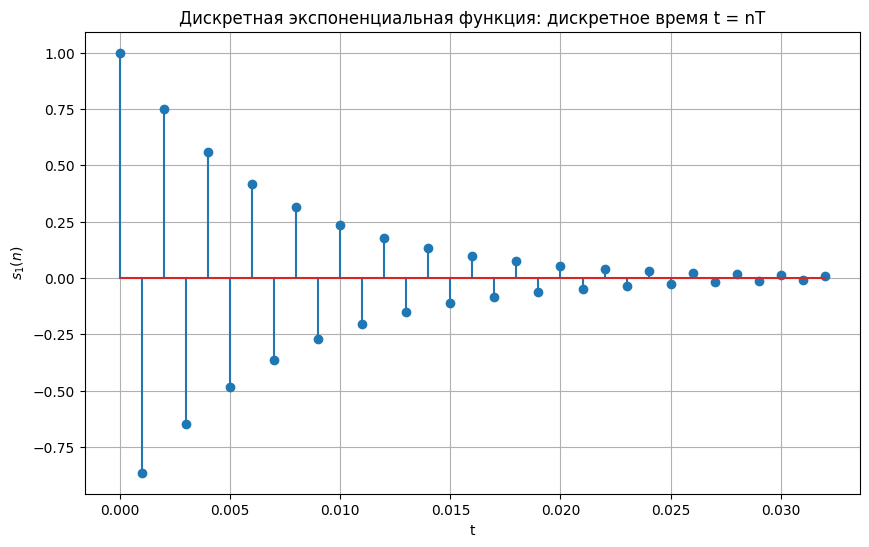

In [ ]:
s1_n = np.where(n < 0, 0, a ** n)

graf_plot(n, s1_n, 'Дискретная экспоненциальная функция: нормированное время n', 'n', '$s_1(n)$')

graf_plot(t, s1_n, 'Дискретная экспоненциальная функция: дискретное время t = nT', 't', r'$s_1(n)$')


#Задание 4
Смоделировать дискретный комплексный гармонический сигнал $ s_2(k) = C \exp(jw_0 k) $ с выводом графиков вещественной и мнимой частей на интервале времени $ n \in [0, N-1]$.

Записать данный сигнал в виде комбинации двух вещественных последовательностей.

Дискретный комплексный гармонический сигнал задаётся как:
$s_2(k) = C \exp(j w_0 k)$
где $ C $ — амплитуда, $ w_0 $ — частота, $ j $ — мнимая единица.

**Запишем сигнал в виде комбинации двух вещественных последовательностей:**
$
s_2(k) = C \cos(w_0 k) + j C \sin(w_0 k)
$
где $ C \cos(w_0 k) $ — вещественная часть, $ C \sin(w_0 k) $ — мнимая часть.

$s2(k) = Ccos(w0k) + jCsin(w0k) = 4cos(0.3491k) + 4jsin(0.3491k)$

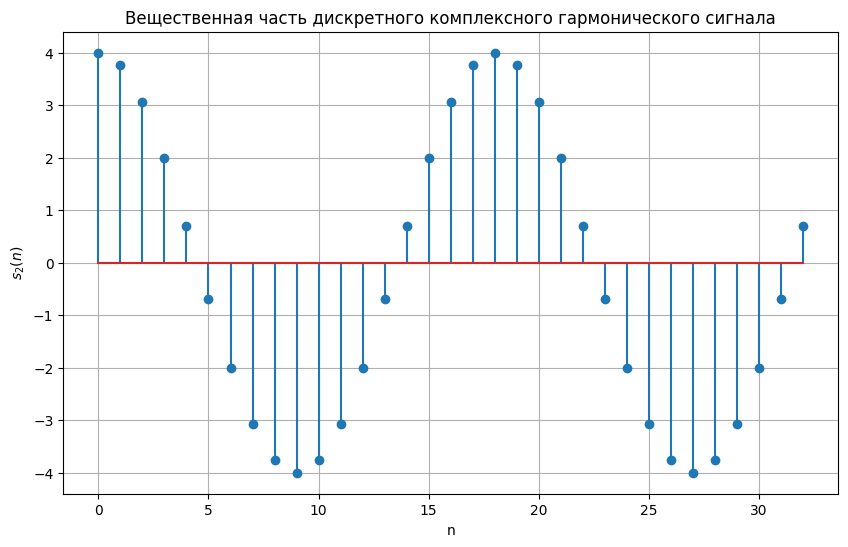

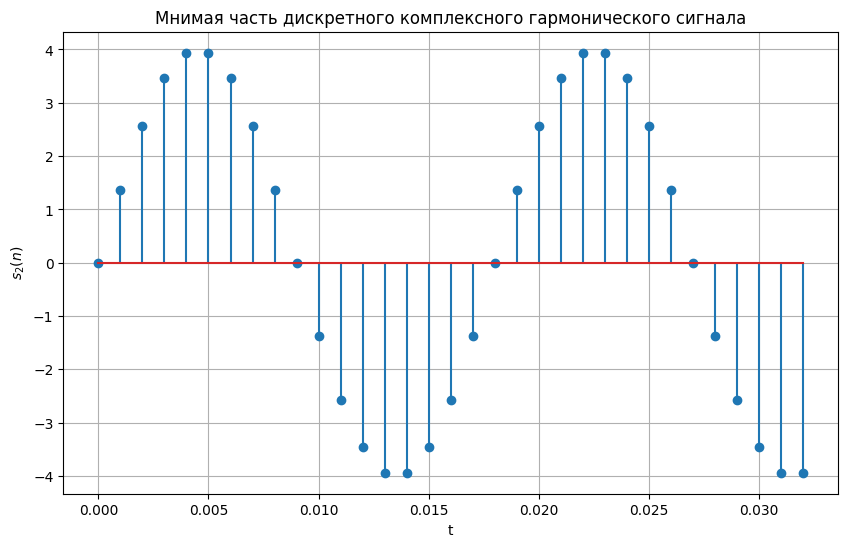

In [ ]:
s2 = C * np.exp(1j * w0 * n)

s2_real = np.real(s2)
s2_imag = np.imag(s2)

graf_plot(n, s2_real, 'Вещественная часть дискретного комплексного гармонического сигнала', 'n', '$s_2(n)$')

graf_plot(t, s2_imag, 'Мнимая часть дискретного комплексного гармонического сигнала', 't', '$s_2(n)$')

#Задание 5
Вывести графики последовательностей $ \delta_d(k), \sigma_d(k) $ и $ s_1(k) $, задержанных на $ m $ отсчетов, на интервале времени $ n \in [0, N-1] $.
   Записать формулы задержанных последовательностей.

**Задержанные последовательности на \( m \) отсчетов:**

- Задержанный единичный импульс:
$
  \delta_d(k - m)
$

- Задержанный единичный скачок:
$
  \sigma_d(k - m)
$

- Задержанная дискретная экспонента:
$
  s_1(k - m)
$

**Формулы:**
- Для любого целого \( k \) и заданного \( m \):

$
  \delta_d(k - m) =
    \begin{cases}
      1, & k - m = 0 \\
      0, & k - m \neq 0
    \end{cases}
$

$
  \sigma_d(k - m) =
    \begin{cases}
      1, & k - m \geq 0 \\
      0, & k - m < 0
    \end{cases}
$

$
  s_1(k - m) =
    \begin{cases}
      0, & k - m < 0 \\
      a^{(k - m)}, & k - m \geq 0
    \end{cases}
$


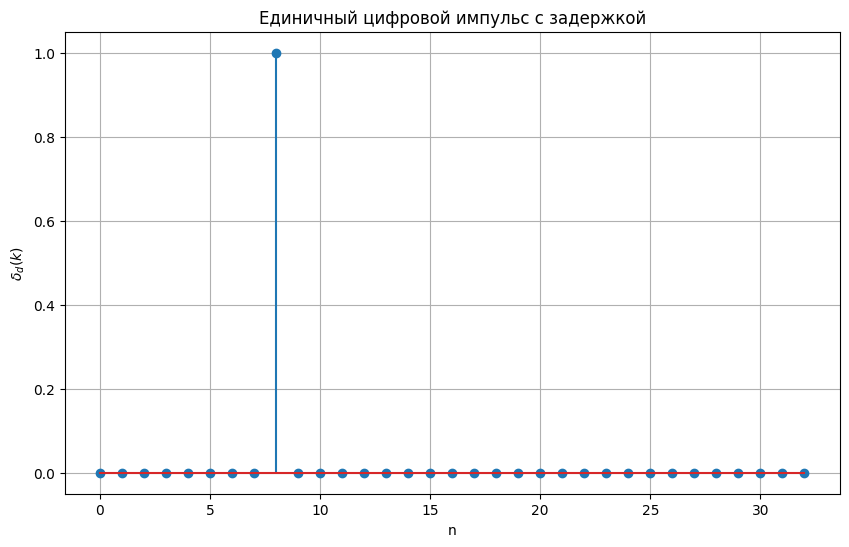

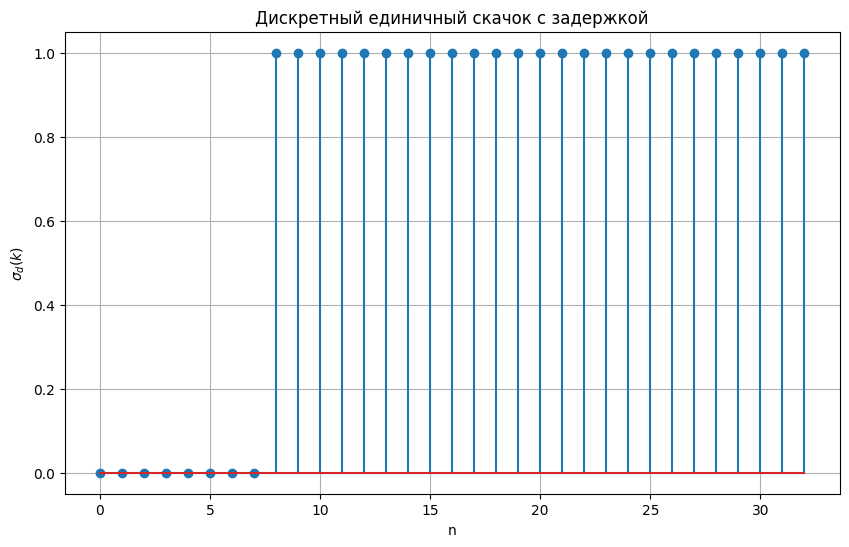

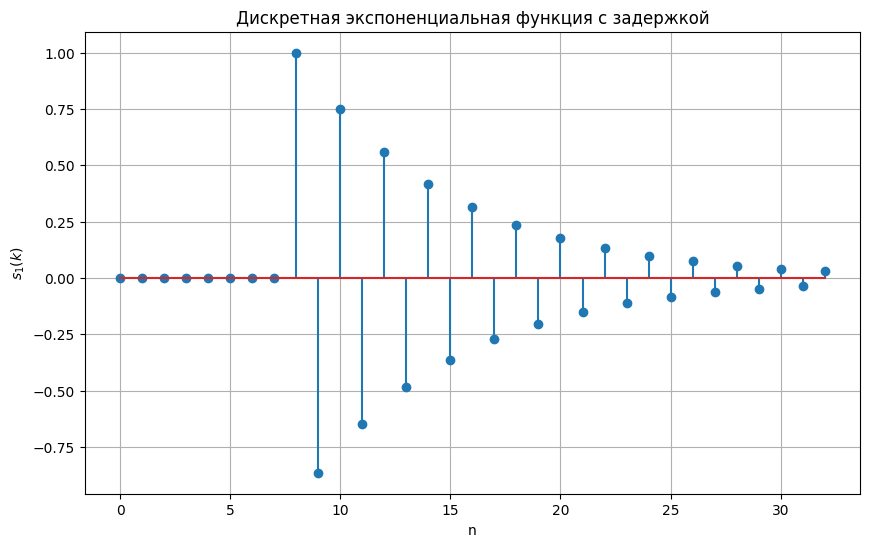

In [ ]:
k_shifted = n - m
# Единичный импульс
delta = np.where(k_shifted == 0, 1, 0)
# Единичный скачок
sigma = np.where(k_shifted >= 0, 1, 0)
# Дискретная экспонента
s1 = np.where(k_shifted < 0, 0, a ** k_shifted)

graf_plot(n, delta, 'Единичный цифровой импульс с задержкой', 'n', '$\\delta_d(k)$')
graf_plot(n, sigma, 'Дискретный единичный скачок с задержкой', 'n', '$\\sigma_d(k)$')
graf_plot(n, s1, 'Дискретная экспоненциальная функция с задержкой', 'n', '$s_1(k)$')


## Выводы

В ходе лабораторной работы были изучены и смоделированы основные стандартные дискретные сигналы: единичный цифровой импульс, дискретный единичный скачок, затухающая экспонента, комплексная гармоническая последовательность и их задержанные версии. Для каждого сигнала построены графики как в дискретном времени $ n $, так и в нормированном времени $ t=nT $, что позволило на практике проследить связь между цифровым и непрерывным представлениями.